In [94]:
import pandas as pd

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df = pd.read_csv ("https://raw.githubusercontent.com/kmschaffer/CUNYDataAnalytics/main/NYPD_Arrest_Data__Year_to_Date_.csv")

In [97]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [98]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,01/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [99]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [100]:
df.shape

(115299, 19)

In [101]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [102]:
df.count()

ARREST_KEY                  115299
ARREST_DATE                 115299
PD_CD                       115278
PD_DESC                     115238
KY_CD                       115238
OFNS_DESC                   115238
LAW_CODE                    115299
LAW_CAT_CD                  114221
ARREST_BORO                 115299
ARREST_PRECINCT             115299
JURISDICTION_CODE           115299
AGE_GROUP                   115299
PERP_SEX                    115299
PERP_RACE                   115299
X_COORD_CD                  115299
Y_COORD_CD                  115299
Latitude                    115299
Longitude                   115299
New Georeferenced Column    115299
dtype: int64

In [103]:
drop_cols=["PD_CD", "PD_DESC", "KY_CD", "OFNS_DESC", "LAW_CODE", "LAW_CAT_CD","X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "New Georeferenced Column"]

In [104]:
df.drop(drop_cols, inplace = True, axis=1)

In [105]:
df['ARREST_BORO'].replace({"B": "Bronx", "K": "Brooklyn", "M": "Manhattan", "Q": "Queens", "S": "Staten Island"}, inplace=True)

In [106]:
df.groupby(["ARREST_BORO"])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
Brooklyn         31004
Manhattan        28948
Bronx            25312
Queens           24654
Staten Island     5381
Name: ARREST_KEY, dtype: int64

In [107]:
df.groupby(["JURISDICTION_CODE"])['ARREST_KEY'].count().sort_values(ascending=False)

JURISDICTION_CODE
0     105588
2       3803
1       3162
3       1034
97       493
15       262
72       189
11       187
73       142
71       125
14        89
7         83
4         69
87        24
13        11
6         10
88         8
85         8
69         3
74         3
16         2
12         1
9          1
8          1
76         1
Name: ARREST_KEY, dtype: int64

In [108]:
115299 - (105588 + 3803+ 3162)
#The number of arrests that are NOT Patrol, Transit, or Housing.

2746

In [109]:
(115299 - 2746)/115299
#This is the percentage of arrests from either patrol, housing or transit.  Since its such a high percentage, I will create a new df just looking at those arrests.

0.9761836616102482

In [110]:
df["JURISDICTION_CODE"].replace({0: "Patrol", 1: "Transit", 2: "Housing"}, inplace=True)

In [112]:
arrests = ["Patrol","Transit","Housing"]

df1 = df[df["JURISDICTION_CODE"].isin(arrests)]

In [113]:
df1.groupby(["JURISDICTION_CODE"])['ARREST_KEY'].count().sort_values(ascending=False)

JURISDICTION_CODE
Patrol     105588
Housing      3803
Transit      3162
Name: ARREST_KEY, dtype: int64

In [117]:
#Research question:  How do the 3 top arrest jurisdictions compare by borough?  

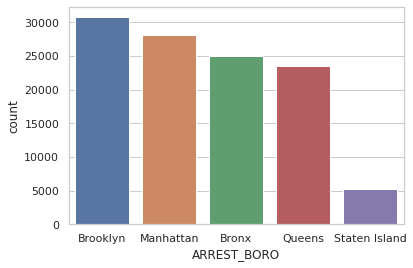

In [118]:
sns.countplot(x="ARREST_BORO", data=df1, order = df1["ARREST_BORO"].value_counts().index)
#Before disaggregating Jurisdiction code, I first wanted to see again what the overall numbers by borough looked like.

Text(0.5, 1.0, 'Arrests by Jurisdiction and Borough')

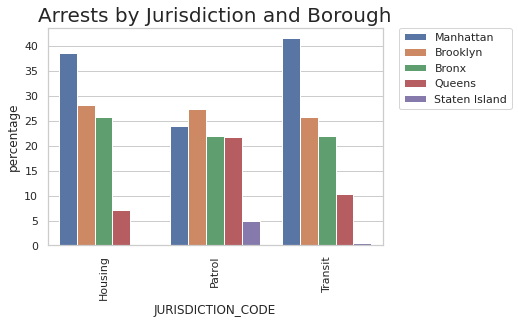

In [119]:
arr_boro = (df1.groupby(["JURISDICTION_CODE"])["ARREST_BORO"]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values("JURISDICTION_CODE"))
p = sns.barplot(x="JURISDICTION_CODE", y="percentage", hue="ARREST_BORO", data=arr_boro)
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Arrests by Jurisdiction and Borough', fontsize=20)
#Since there was a much higher number of arrests by patrol, I changed the y-axis to percentage to get a better idea of how each jurisdiction compares to the other.

**Conclusion:  While Brooklyn had a higher percentage of patrol arrests (though not much higher than Manhattan, Bronx and Queens), a higher percentage of arrests by transit and housing police were made in Manhattan. **